## Analysis of the Magnetization mapping $\sigma^{z} \rightarrow \sigma^{x} $

#### Imports

In [1]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm.notebook import tqdm, trange


### Part (a) Study the scaling property at different $h_{max} $

#### Data

In [27]:
h_max=1.0 #field
ls=[16,32,64,128] #sizes
ns=[100,100,100,100] #samples


xs_ml={} # sigma_x ml
xs={} # sigma_x exact
zs={} # sigma_z exact
for i in range(len(ls)):
    print(i)

    # load the data
    data=np.load(f'data/den2magn_dataset_1nn/test_unet_periodic_1nn_l_{ls[i]}_h_{h_max}_ndata_{ns[i]}.npz')
    # target  
    x=torch.tensor(data['magnetization_x'],dtype=torch.double)
    # input
    z=torch.tensor(data['density'],dtype=torch.double)
    # load the model and compute xs_ml
    model=torch.load(f'model_rep/1nn_den2magn/h_{h_max}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
    x_ml=model(z).detach().numpy()
    xs_ml[ls[i]]=np.abs(x_ml)
    xs[ls[i]]=np.abs(x.detach().numpy()) 
    zs[ls[i]]=z.detach().numpy()


0
1
2
3


We predict the magnetization up to a sign. We found inconsistency in the sign of $\sigma^x$ in the target dataset (DMRG problems? perturbation too low?)

#### $ |\Delta x|$ vs $l$

According to the $L_2$ metric we compute the error:

$\langle \langle|\Delta x| \rangle \rangle =\frac{1}{N_{batch}}\sum^{N_{batch}}_i |\vec{x_i}-\vec{x_{ml,i}}|/|\vec{x_i}|$

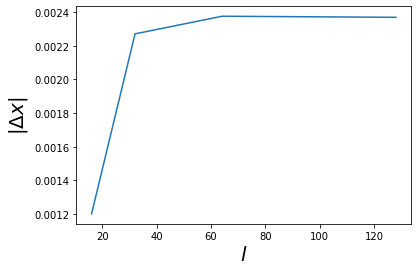

In [28]:
dxs=[]
#compute the error for each size
for l in ls:
    dx= np.average( np.sqrt( np.average((xs[l]-xs_ml[l])**2,axis=-1))/np.sqrt(np.average((xs[l])**2,axis=-1))  )
    dxs.append(dx)
    
#plot the behaviour
#plt.figure(figsize=(10,10))
plt.plot(ls,dxs)
plt.xlabel(r'$l$',fontsize=20)
plt.ylabel(r'$|\Delta x|$',fontsize=20)
plt.show()